# College tuition, diversity, and pay

**Importing the data**

The data came from many different tables from US DoE and others (via Tidy Tuesday, https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-03-10/readme.md)

**First, I imported the `salary_potential` table.**

In [2]:
import pandas as pd

# URL of the CSV file
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv'

# Reading the CSV file from the URL
salary_potential = pd.read_csv(url)

# Display the first few rows of the dataframe
salary_potential.head()


,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


**Then, the `tuition_income` table.**

In [3]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv'

# Reading the CSV file from the URL
tuition_income = pd.read_csv(url)

# Display the first few rows of the dataframe
tuition_income.head()

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"


**And, the `tuition_cost` table**

In [4]:
tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv')


In [5]:
tuition_cost.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


**Merging the datasets**


First, I merged the `salary_potential` and `tuition_income` tables on the common column `name`.

In [6]:
# Merging the datasets
merged_data = pd.merge(salary_potential, tuition_income, on='name')
merged_data.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl
0,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,11380.0,"0 to 30,000"
1,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,13545.0,"30,001 to 48,000"
2,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,16267.0,"48_001 to 75,000"
3,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,17923.0,"75,001 to 110,000"
4,1,Auburn University,Alabama,54400,104500,51.0,31,AL,22352,2011,On Campus,19536.0,"Over 110,000"


In [7]:
merged_data.to_csv('merged_data.csv', index=False)

**Then, I merged the `salary_potential` table and `tuition_cost` tables on `name`**

In [8]:
merged_data2 = pd.merge(salary_potential, tuition_cost,on='name')
merged_data2.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,1,Auburn University,Alabama,54400,104500,51.0,31,Alabama,AL,Public,4 Year,13332.0,11276,24608,30524,43856
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45,Alabama,AL,Public,4 Year,10094.0,10714,20808,22362,32456
2,4,Tuskegee University,Alabama,54500,93500,61.0,30,Alabama,AL,Private,4 Year,9650.0,22170,31820,22170,31820
3,5,Samford University,Alabama,48400,90500,52.0,3,Alabama,AL,Private,4 Year,10550.0,31650,42200,31650,42200
4,6,Spring Hill College,Alabama,46600,89100,53.0,12,Alabama,AL,Private,4 Year,13462.0,39464,52926,39464,52926


**Out of State Tuition and Mid Career Pay had a correlation of .634**

In [9]:
correlation = merged_data2['out_of_state_tuition'].corr(merged_data2['mid_career_pay'])
correlation

np.float64(0.6340129890226179)

**Scatterplot of Mid Career Pay vs. Out of State Tuition**

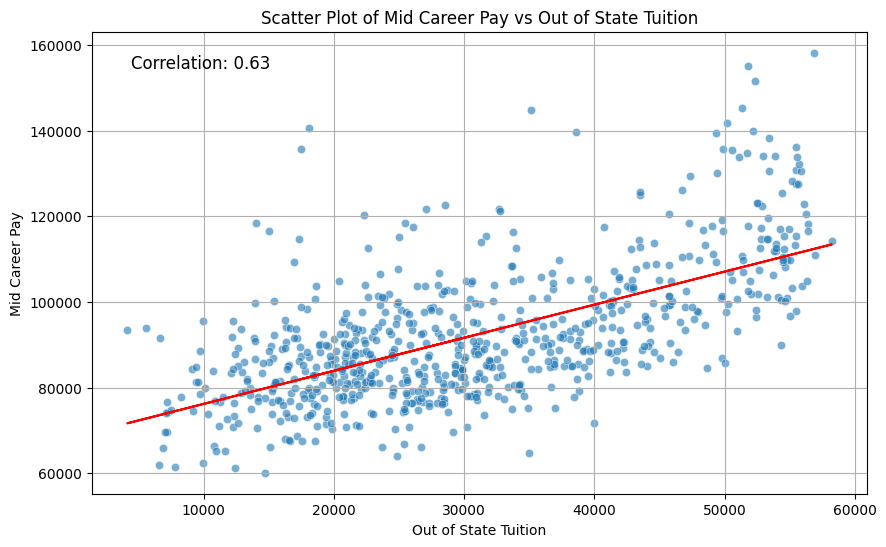

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(merged_data2['out_of_state_tuition'], merged_data2['mid_career_pay'], alpha=0.6, edgecolors='w', linewidth=0.5)

# Perform linear regression to get the trend line
x = merged_data2['out_of_state_tuition']
y = merged_data2['mid_career_pay']
m, b = np.polyfit(x, y, 1)  # Linear fit (degree 1)

# Plot the trend line
plt.plot(x, m*x + b, color='red')

# Add titles and labels
plt.title('Scatter Plot of Mid Career Pay vs Out of State Tuition')
plt.xlabel('Out of State Tuition')
plt.ylabel('Mid Career Pay')

# Display the correlation in the plot
correlation = np.corrcoef(x, y)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show the plot
plt.grid(True)
plt.show()

In [11]:
# Calculate R-squared
y_pred = m * x + b
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Print the slope, intercept, and R-squared
print(f"Slope (m): {m}")
print(f"R-squared: {r_squared:.2f}")

Slope (m): 0.7723124056215699
R-squared: 0.40


**Some Exploratory Data Analysis (EDA)**

In [12]:
merged_data.isna().sum()

,0
rank,0
name,0
state_name,0
early_career_pay,0
mid_career_pay,0
make_world_better_percent,1581
stem_percent,0
state,0
total_price,0
year,0


In [13]:
merged_data2.isna().sum()

,0
rank,0
name,0
state_name,0
early_career_pay,0
mid_career_pay,0
make_world_better_percent,26
stem_percent,0
state,0
state_code,0
type,0


**I noticed that some missing data was reported as 0s. This is misleading.**
- Particularly, I noticed this with the net cost column, which was a key feature I wanted to analyze.

In [14]:
#Cross-Checking these Values with the Internet shows that a lot of these values were meant to be NAs
merged_data[merged_data['net_cost'] == 0]

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl
274,4,Tuskegee University,Alabama,54500,93500,61.0,30,AL,39383,2017,On Campus,0.0,"Over 110,000"
279,4,Tuskegee University,Alabama,54500,93500,61.0,30,AL,39383,2018,On Campus,0.0,"Over 110,000"
301,4,Tuskegee University,Alabama,54500,93500,61.0,30,AL,40037,2017,Off Campus,0.0,"Over 110,000"
306,4,Tuskegee University,Alabama,54500,93500,61.0,30,AL,40037,2018,Off Campus,0.0,"Over 110,000"
1698,24,Amridge University,Alabama,35700,65900,NaN,0,AL,19600,2017,Off Campus,0.0,"48_001 to 75,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63161,13,City University of Seattle,Washington,51500,94600,54.0,4,WA,30983,2018,Off Campus,0.0,"0 to 30,000"
63162,13,City University of Seattle,Washington,51500,94600,54.0,4,WA,30983,2018,Off Campus,0.0,"30,001 to 48,000"
63163,13,City University of Seattle,Washington,51500,94600,54.0,4,WA,30983,2018,Off Campus,0.0,"48_001 to 75,000"
63164,13,City University of Seattle,Washington,51500,94600,54.0,4,WA,30983,2018,Off Campus,0.0,"75,001 to 110,000"


- The net cost for Tuskegee University in 2017 for the top income bracket for example, was not actually 0.

I decided to find schools where the net cost for the highest income level was 0 as this generally indicated that they may have actually be representing missing values.

In [15]:
# Easiest way to detect where 0s should have been inputed as null values were to have find schools where net cost for highest income level was 0
netcostzero = merged_data[(merged_data['net_cost'] == 0) & (merged_data['year']==2018) & (merged_data['income_lvl']=='Over 110,000'
)]

# Get the unique values in the 'name' column
unique_names = netcostzero['name'].unique()

# Display the unique values
print(unique_names)

['Tuskegee University' 'Amridge University' 'Henderson State University'
 'Charles R Drew University of Medicine and Science'
 'Colorado Mesa University' 'Nazarene Bible College'
 'Charter Oak State College' 'Polytechnic University of Puerto Rico-Miami'
 'Polytechnic University of Puerto Rico-Orlando' 'Allen College'
 'Maharishi University of Management' 'Kentucky State University'
 'Berea College' 'Midway University'
 'University of Maryland-University College' 'University of Baltimore'
 'Notre Dame of Maryland University' 'Rust College'
 'Mississippi Valley State University'
 'Doane University-Graduate and Professional Studies'
 'Thomas Edison State University' 'United States Merchant Marine Academy'
 'Johnson & Wales University-Online' 'Western Governors University'
 'Independence University' 'City University of Seattle']


- Above are the schools that had 0s for the highest income bracket
- Since this was not that many and given my week time frame, I decided to drop those schools from my analysis for now below
- This is important to be transparent about in my analysis.
- In the future, I could try to find other ways to fill the missing data appropriately.

In [16]:
#Then I dropped those schools since there were not that many:
mask = (merged_data['net_cost'] == 0) & (merged_data['year'] == 2018) & (merged_data['income_lvl'] == 'Over 110,000')

names_to_drop = merged_data.loc[mask, 'name'].unique()

final_mask = merged_data['name'].isin(names_to_drop)

merged_data = merged_data[~final_mask]




In [17]:
#There were still some schools with this problem still in other income levels, but I decided to handle those on case-by-case basis since Stanford's 0 for lowest income level for instance is true.
merged_data[(merged_data['net_cost'] == 0) & (merged_data['year']==2018)]

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl
4172,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,0.0,"0 to 30,000"
9185,7,Embry-Riddle Aeronautical University-Worldwide,Florida,55800,96800,67.0,3,FL,23464,2018,Off Campus,0.0,"75,001 to 110,000"
14771,23,Methodist College,Illinois,51400,90500,NaN,0,IL,42100,2018,On Campus,0.0,"30,001 to 48,000"
14811,23,Methodist College,Illinois,51400,90500,NaN,0,IL,39000,2018,Off Campus,0.0,"30,001 to 48,000"
18752,25,Iowa Wesleyan University,Iowa,42600,77200,60.0,8,IA,40173,2018,On Campus,0.0,"75,001 to 110,000"
18786,25,Iowa Wesleyan University,Iowa,42600,77200,60.0,8,IA,40413,2018,Off Campus,0.0,"75,001 to 110,000"
36617,10,Bellevue University,Nebraska,49400,84800,57.0,23,NE,20970,2018,On Campus,0.0,"75,001 to 110,000"
36645,10,Bellevue University,Nebraska,49400,84800,57.0,23,NE,25782,2018,Off Campus,0.0,"75,001 to 110,000"
40848,5,Western New Mexico University,New-Mexico,41700,76700,75.0,4,NM,22454,2018,On Campus,0.0,"48_001 to 75,000"
40884,5,Western New Mexico University,New-Mexico,41700,76700,75.0,4,NM,22454,2018,Off Campus,0.0,"48_001 to 75,000"


There were still some schools with this problem still in other income levels, but I decided to handle those on case-by-case basis since Stanford's 0 for lowest income level for instance is true.


**Finding a way to measure financial value: Feature Engineering / Data Wrangling**

In [18]:
# Value Score Column
merged_data['new_value_score'] = ((10*merged_data['early_career_pay']) + (30*merged_data['mid_career_pay'])) - (4* merged_data['net_cost'])

<ipython-input-18-1426736950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['new_value_score'] = ((10*merged_data['early_career_pay']) + (30*merged_data['mid_career_pay'])) - (4* merged_data['net_cost'])


- merged_data includes `salary_potential` and `tuition_income` table

**Filtering for 2018 (most recent data available)**

In [ ]:
#Filtering for year 2018
md2018 = merged_data[merged_data['year'] == 2018]

In [ ]:
#Sorting by value score
newvalue_sorted = md2018.sort_values('new_value_score', ascending=False)

In [ ]:
newvalue_sorted.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4054,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,10777.523130,"30,001 to 48,000",5.590890e+06
4055,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,14293.351680,"48_001 to 75,000",5.576827e+06
4053,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,14743.797160,"0 to 30,000",5.575025e+06
4056,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,27342.361120,"75,001 to 110,000",5.524631e+06
27207,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,5070.779193,"30,001 to 48,000",5.498717e+06


**Creating a df for just On Campus Schools in 2018**

In [ ]:
# Filtering for just On Campus Schools
newvalue_on_campus = newvalue_sorted[newvalue_sorted['campus']=='On Campus']


**Net cost by income level**

In [ ]:
merged_data.groupby('income_lvl')['net_cost'].mean()


income_lvl
0 to 30,000          14921.298532
30,001 to 48,000     15915.412221
48_001 to 75,000     18794.828462
75,001 to 110,000    21899.741578
Over 110,000         25092.871994
Name: net_cost, dtype: float64

**Top Value Schools for Highest Income Bracket**

In [ ]:
#Top for highest
newvalue_on_campus[newvalue_on_campus['income_lvl']=='Over 110,000'].head(7)

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4057,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,52708.53986,"Over 110,000",5.423166e+06
27210,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,43082.85042,"Over 110,000",5.346669e+06
4097,3,California Institute of Technology,California,84100,151600,53.0,97,CA,72084,2018,On Campus,44885.44398,"Over 110,000",5.209458e+06
41009,1,Albany College of Pharmacy and Health Sciences,New-York,81000,144800,82.0,2,NY,49585,2018,On Campus,35110.96718,"Over 110,000",5.013556e+06
41078,3,Webb Institute,New-York,80800,141800,NaN,100,NY,70825,2018,On Campus,20839.48070,"Over 110,000",4.978642e+06
4176,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,42200.22309,"Over 110,000",4.977199e+06
27250,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,45113.79596,"Over 110,000",4.971545e+06


In [ ]:
#Very correlated with just your early career pay but different still as can see with Webb above for instance
newvalue_on_campus['early_career_pay'].corr(newvalue_on_campus['new_value_score'])

0.9873740008320888

In [ ]:
newvalue_on_campus[(newvalue_on_campus['income_lvl']=='Over 110,000') & (newvalue_on_campus['name']== 'Harvard University')]

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
27250,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,45113.79596,"Over 110,000",4.971545e+06


**Top 5 Value Schools for Lowest Income Bracket**

In [ ]:
#Top 5 for Lowest
newvalue_on_campus[newvalue_on_campus['income_lvl']=='0 to 30,000'].head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4053,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,14743.797160,"0 to 30,000",5.575025e+06
27206,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,7972.504963,"0 to 30,000",5.487110e+06
4093,3,California Institute of Technology,California,84100,151600,53.0,97,CA,72084,2018,On Campus,943.502201,"0 to 30,000",5.385226e+06
27246,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,-246.330344,"0 to 30,000",5.152985e+06
4172,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,0.000000,"0 to 30,000",5.146000e+06


**Manually Checking Some Average Value Scores and Net Cost between Top and Lowest Income Bracket**
- I did not really end up using any of this

In [ ]:
#Median H Mudd Value Score & Net Cost
(5.575025e+06 + +5.576827e+06)/2
(14293.351680	+14743.797160	)/2

14518.57442

In [ ]:
#Median MIT Value Score & Net cost
(5.498717e+06 + 5.483184e+06) / 2
(7972.504963 +8954.049910	 ) /2

8463.2774365

In [ ]:
#Cal Tech Median Value Score & Net cost
(5.344839e+06 + 5.342088e+06)/2

5343463.5

In [ ]:
#harvard median value score
(5.149293e+06 + 5.137469e+06) /2

5143381.0

In [ ]:
#Stanfard's median value score
(5.135061e+06 + 5.132918e+06)/2

5133989.5

In [ ]:
#All 50 states included in dataset
len(newvalue_on_campus['state_name'].unique())

50

**Dataframe subset of Low Income 2018 On Campus Schools, sorted by Top Value Scores**
- I used this dataset for some viz in Tableau as well.
- Works nicely because each school appears only once in the dataframe

In [ ]:
#Will use this for some visualizations in Tableau
toplowincomevaluescores = newvalue_on_campus[newvalue_on_campus['income_lvl']=='0 to 30,000']
toplowincomevaluescores.to_csv('toplowincome.csv', index=False)

**Top 5 Value Schools for Lower Middle Income Bracket**

In [ ]:
#Top 5 for Lower Middle
newvalue_on_campus[newvalue_on_campus['income_lvl']=='30,001 to 48,000'].head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4054,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,10777.523130,"30,001 to 48,000",5.590890e+06
27207,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,5070.779193,"30,001 to 48,000",5.498717e+06
4094,3,California Institute of Technology,California,84100,151600,53.0,97,CA,72084,2018,On Campus,11040.271180,"30,001 to 48,000",5.344839e+06
27247,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,676.872945,"30,001 to 48,000",5.149293e+06
4173,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,2734.851805,"30,001 to 48,000",5.135061e+06


**Top Value Scores for Middle Value Bracket**

In [ ]:
#Top 5 for Middle
newvalue_on_campus[newvalue_on_campus['income_lvl']=='48_001 to 75,000'].head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4055,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,14293.351680,"48_001 to 75,000",5.576827e+06
27208,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,8954.049910,"48_001 to 75,000",5.483184e+06
4095,3,California Institute of Technology,California,84100,151600,53.0,97,CA,72084,2018,On Campus,11727.926680,"48_001 to 75,000",5.342088e+06
27248,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,3632.837070,"48_001 to 75,000",5.137469e+06
4174,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,3270.444839,"48_001 to 75,000",5.132918e+06


**Top 5 Value Scores for Upper Middle Income Bracket**

In [ ]:
#Top 5 for Upper Middle
newvalue_on_campus[newvalue_on_campus['income_lvl']=='75,001 to 110,000'].head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,state,total_price,year,campus,net_cost,income_lvl,new_value_score
4056,1,Harvey Mudd College,California,88800,158200,55.0,85,CA,76947,2018,On Campus,27342.36112,"75,001 to 110,000",5.524631e+06
27209,1,Massachusetts Institute of Technology,Massachusetts,86300,155200,52.0,69,MA,70240,2018,On Campus,20549.15300,"75,001 to 110,000",5.436803e+06
4096,3,California Institute of Technology,California,84100,151600,53.0,97,CA,72084,2018,On Campus,24913.20802,"75,001 to 110,000",5.289347e+06
4175,4,Stanford University,California,79000,145200,56.0,51,CA,71587,2018,On Campus,12296.09980,"75,001 to 110,000",5.096816e+06
27249,2,Harvard University,Massachusetts,74800,146800,54.0,19,MA,71650,2018,On Campus,16721.54634,"75,001 to 110,000",5.085114e+06


**Diversity Dataframe**

In [ ]:
diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv')

In [ ]:
diversity_school.head(15)

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984
5,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019
6,University of Phoenix-Arizona,195059,Arizona,White,58209
7,University of Phoenix-Arizona,195059,Arizona,Two Or More Races,19039
8,University of Phoenix-Arizona,195059,Arizona,Unknown,65163
9,University of Phoenix-Arizona,195059,Arizona,Non-Resident Foreign,3355


**Diversity Data Wrangling**
- I filtered for Total Minority Category and created a new collumn for Minority %
- Result is a dataframe that where each school appears only once with their total minority %, etc.

In [ ]:
total_minority = diversity_school[diversity_school['category']=='Total Minority']
total_minority['minority_pct'] = total_minority['enrollment'] / total_minority['total_enrollment']

<ipython-input-39-3d884d36172e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_minority['minority_pct'] = total_minority['enrollment'] / total_minority['total_enrollment']


- Will use this data for some Tableau viz too

In [ ]:
#Will use this for visualization in Tableau
total_minority.to_csv('total_minority.csv', index=False)

**Historical Tuition Dataframe**

In [ ]:
historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv')

**Data Wrangling**

In [ ]:

historical_tuition['Year_cleaned'] = historical_tuition['year'].str.split('-').str[0].astype(int)
historical_tuition.info()
historical_tuition.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          270 non-null    object
 1   year          270 non-null    object
 2   tuition_type  270 non-null    object
 3   tuition_cost  270 non-null    int64 
 4   Year_cleaned  270 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.7+ KB


,type,year,tuition_type,tuition_cost,Year_cleaned
0,All Institutions,1985-86,All Constant,10893,1985
1,All Institutions,1985-86,4 Year Constant,12274,1985
2,All Institutions,1985-86,2 Year Constant,7508,1985
3,All Institutions,1985-86,All Current,4885,1985
4,All Institutions,1985-86,4 Year Current,5504,1985


**Dollar Inflation Adjsuted Tuition Costs Over Years Graph**

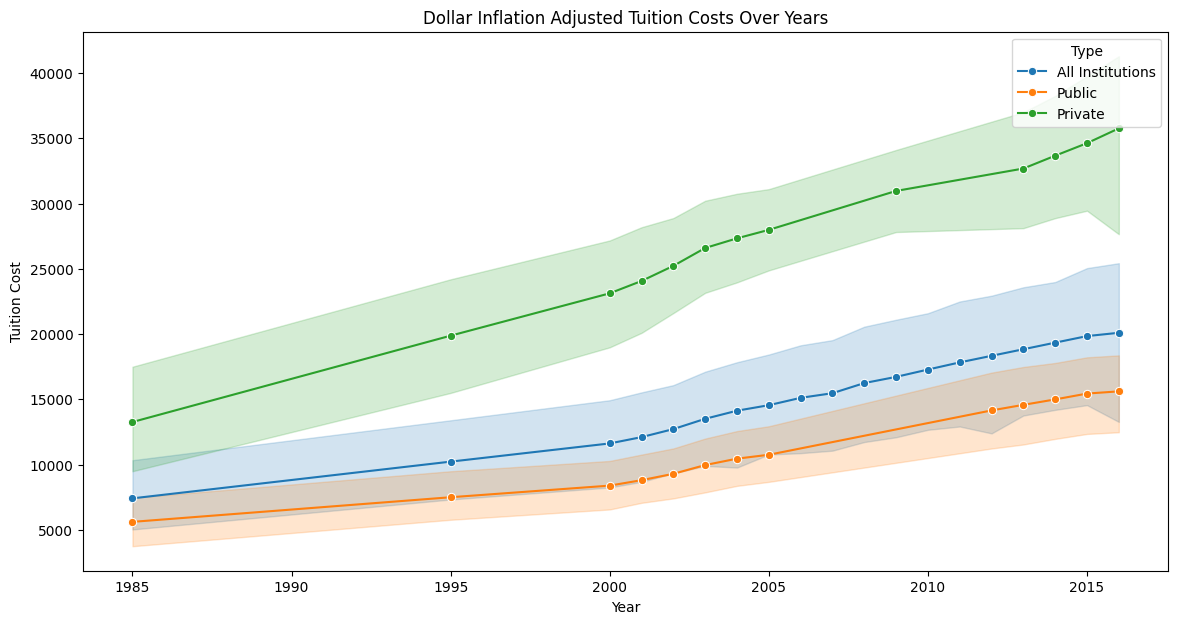

In [ ]:
# Plotting the data
import seaborn as sns
plt.figure(figsize=(14, 7))

# Example: Line plot for All Current category over years for Public and Private
sns.lineplot(historical_tuition[historical_tuition['type'] == 'All Constant'], x=historical_tuition['Year_cleaned'], y=historical_tuition['tuition_cost'], hue=historical_tuition['type'], marker='o')

# Add titles and labels
plt.title('Dollar Inflation Adjusted Tuition Costs Over Years')
plt.xlabel('Year')
plt.ylabel('Tuition Cost')
plt.legend(title='Type')

# Show plot
plt.show()

This could be interesting to look into more. It seems financial aid is crucial more than ever. Maybe quality and services in education are improving? Also would be key to see if this is disproportionately affecting lower income levels.